In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster

data = pd.read_csv("Spotify-2000.csv")
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

# Introducion

Cluster analysis, a fundamental technique in machine learning, is widely used to discover underlying structures in sets of data 
by grouping similar data. In this exercise, we undertook to explore the field of classification of musical genres using clustering techniques. The main objective was to group musical genres into based on their similar audio characteristics, using song data popular ones from Spotify.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [3]:
data = data.drop("Index", axis=1)

In [4]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                            Year  Beats Per Minute (BPM)    Energy  \
Year                    1.000000                0.012570  0.147235   
Beats Per Minute (BPM)  0.012570                1.000000  0.156644   
Energy                  0.147235                0.156644  1.000000   
Danceability            0.077493               -0.140602  0.139616   
Loudness (dB)           0.343764                0.092927  0.735711   
Liveness                0.019017                0.016256  0.174118   
Valence                -0.166163                0.059653  0.405175   
Acousticness           -0.132946               -0.122472 -0.665156   
Speechiness             0.054097                0.085598  0.205865   
Popularity             -0.158962               -0.003181  0.103393   

                        Danceability  Loudness (dB)  Liveness   Valence  \
Year                        0.077493       0.343764  0.019017 -0.166163   
Beats Per Minute (BPM)     -0.140602       0.092927  0.016256  0.059653   
Ener

In [5]:
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness"]]

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
scaled_data2 = scaler.fit_transform(data2)

from sklearn.cluster import KMeans

# Set the number of clusters
num_clusters = 10

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the scaled data and predict clusters
clusters = kmeans.fit_predict(scaled_data2)


In [6]:
# Add clusters to the original dataset
data["Music Segments"] = clusters

# Apply MinMaxScaler to the "Music Segments" column
scaler = MinMaxScaler()
data["Music Segments"] = scaler.fit_transform(data[["Music Segments"]])

# Map cluster labels to descriptive names
data["Music Segments"] = data["Music Segments"].map({0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5", 5: "Cluster 6", 6: "Cluster 7", 7: "Cluster 8", 8: "Cluster 9", 9: "Cluster 10"})

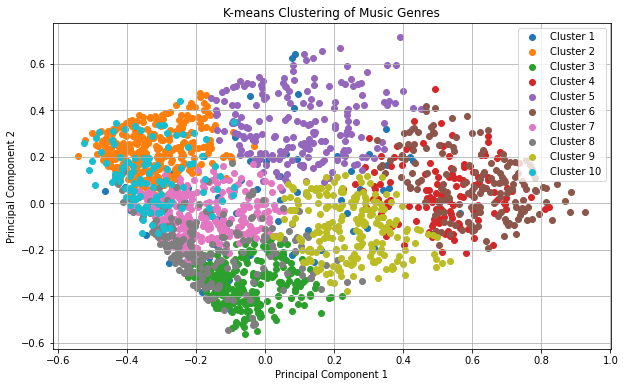

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data2)

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster_id in range(num_clusters):
    cluster_points = pca_data[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id+1}')

plt.title('K-means Clustering of Music Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


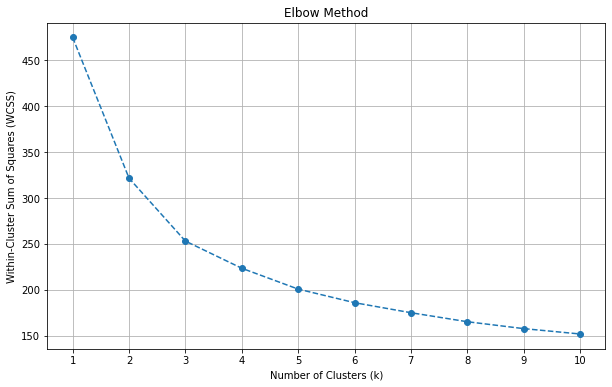

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize list to store within-cluster sum of squares (WCSS)
wcss = []

# Fit KMeans for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data2)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [11]:
# Perform K-means clustering with the optimal number of clusters
optimal_num_clusters = 3  # Update with the optimal number of clusters obtained from the elbow method or silhouette score

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data2)

# Add clusters as a new column to the original dataset
data["Music Segments"] = clusters

# Display the table of each cluster
for cluster_id in range(optimal_num_clusters):
    cluster_data = data[data["Music Segments"] == cluster_id]
    print(f"\nCluster {cluster_id}:\n{cluster_data}")


Cluster 0:
                       Title             Artist        Top Genre  Year  \
1                Black Night        Deep Purple       album rock  2000   
4     Waitin' On A Sunny Day  Bruce Springsteen     classic rock  2002   
9                 Without Me             Eminem  detroit hip hop  2002   
12             Als Het Golft            De Dijk      dutch indie  2000   
14    Fluorescent Adolescent     Arctic Monkeys      garage rock  2007   
...                      ...                ...              ...   ...   
1982               Get Ready         Rare Earth       blues rock  1969   
1985        Blue Suede Shoes      Elvis Presley  adult standards  1956   
1986          Jailhouse Rock      Elvis Presley  adult standards  1958   
1990               Hound Dog      Elvis Presley  adult standards  1958   
1991         Johnny B. Goode        Chuck Berry       blues rock  1959   

      Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
1                   

In [12]:
# Count the occurrences of each cluster label
cluster_counts = data["Music Segments"].value_counts()

# Sort the clusters based on the counts (from most listened to the least)
sorted_clusters = cluster_counts.sort_values(ascending=False)

# Display the sorted clusters
print("Sorted Clusters (from most listened to the least):")
print(sorted_clusters)

Sorted Clusters (from most listened to the least):
1    724
0    715
2    555
Name: Music Segments, dtype: int64
